# Demo de Algortimos de Inducción para generar reglas para clasificar


In [1]:
#@title Librerías a usar
import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print("Librerías cargadas")

Librerías cargadas


In [2]:
#@title Acceder al Drive

# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoML/datos/'  #@param {type:"string"}


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#@title Cargar datos

## selección de los parámetros 

def cargarNombreClases(path, archivo_datos, atributo_clase, nombre_clases):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return atributo_clase, nombre_clases

#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'IRIS.csv'  #@param {type:"string"}
#@markdown ### Nombre del atributo clase / objetivo:
atributo_clase = '-' #@param {type:"string"}
#@markdown ### Descripción de los valores del atributo clase / objetivo:  (nota: siempre debe comienzar en 0, por lo que si no tiene valor 0, agregar "na")
nombre_clases = '-' #@param {type:"string"}

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos)
print("Archivo de datos ", archivo_datos, " cargado")

print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())


# intenta cargar configuración asociada a los datos
if atributo_clase == '' or  atributo_clase == '-':
  # trata de obtener la configuración del archivo asociado
  atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos, atributo_clase, nombre_clases)

# define nombre atributo de CLASE para ejemplo IRIS
ClassAttributeName = atributo_clase

print("\n> Atributo clase ", ClassAttributeName, ": [", nombre_clases, "]")

CLASES = []
# toma configuración de nombre de clases
for val in nombre_clases.split(','):
  CLASES.append( val )

# asignar valores discretos para Atributo Clase
if len(CLASES) > 0:
  print("> Actualizando valores del atributo clase: ", atributo_clase, "")
  i = 0
  for val in CLASES:
    df[ClassAttributeName] = df[ClassAttributeName].replace(i, str(val).strip())
    i = i + 1

# genera los datos solo con la clase para entrenar y probar
Y = np.array(df.pop(ClassAttributeName))
X = np.array(df)


# devuelve listas de columnas numéricas y no numéricas
def devolNombreColumnas(ndf):
  colValues = []
  for col in ndf.columns:
      colValues.append( col )
  return colValues

# determina el nombre de las columnas de entrada
atributos_entrada = devolNombreColumnas(df)



Archivo de datos  IRIS.csv  cargado

> Cabecera: 
   LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo  Clase
0          5.1          3.5          1.4          0.2      1
1          4.9          3.0          1.4          0.2      1
2          4.7          3.2          1.3          0.2      1
3          4.6          3.1          1.5          0.2      1
4          5.0          3.6          1.4          0.2      1

> Características: 
       LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo       Clase
count   150.000000   150.000000   150.000000   150.000000  150.000000
mean      5.843333     3.054000     3.758667     1.198667    2.000000
std       0.828066     0.433594     1.764420     0.763161    0.819232
min       4.300000     2.000000     1.000000     0.100000    1.000000
25%       5.100000     2.800000     1.600000     0.300000    1.000000
50%       5.800000     3.000000     4.350000     1.300000    2.000000
75%       6.400000     3.300000     5.100000     1.800000    3.000000
max

In [4]:
#@title Preparar datos 

#@markdown Para algoritmos de inducción siempre el atributo clase debe ser considerado como Discreto
considerar_atributo_clase = "dicreto - CLASIFICACION" #@param ["dicreto - CLASIFICACION"]  ## , "continuo - ESTIMACION"

#@markdown Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   75#@param {type:"integer"}

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

# separa al azar usando muestreo con proporción indicada
# intenta hacer muestreo estatificado 
try:
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain), stratify=Y)
except ValueError:
  print("-- No se puede aplicar Muestreo Estratificado! -> se usa Muestreo Simple \n")
  # hace muestreo simple
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain))

print("> se considera problema de CLASIFICACIÓN \n")


print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for i in range(len(CLASES)):
  cant = 0
  for y in y_train:
    if i == y: cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for i in range(len(CLASES)):
  cant = 0
  for y in y_test:
    if i == y: cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)




> se considera problema de CLASIFICACIÓN 


> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (112, 4)
 - y_train (cant):  112
     na [ 0 ]: 0
     Setosa [ 1 ]: 0
     Versicolor [ 2 ]: 0
     Virginica [ 3 ]: 0

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (38, 4)
 - y_test (cant):  38
     na [ 0 ]: 0
     Setosa [ 1 ]: 0
     Versicolor [ 2 ]: 0
     Virginica [ 3 ]: 0


In [10]:
#@title Aplicar Algoritmo de Inducción

# parámetros

param_criterio = "Entropy" #@param ["Entropy", "Error", "Gini impurity"]
if param_criterio == "Entropy":
  pCriteria = "entropy"
elif param_criterio == "Error":
  pCriteria = "log_loss"
#elif param_criterio == "Gini impurity":
else:
  pCriteria = "gini"
param_max_depth = 0 #@param {type:"number"}
if param_max_depth < 1: 
    # menor que 1 es opcional
    param_max_depth = None
param_split_strategy = "Best" #@param ["Best", "Random"]
if param_split_strategy== "Best":
  pSpliter = "best"
#elif param_split_strategy == "Random":
else:
  pSpliter = "random"
param_min_samples_split  = 0 #@param {type:"number"}
if param_min_samples_split  < 2: 
    param_min_samples_split  = 2
param_min_samples_leaf  = 1 #@param {type:"number"}
if param_min_samples_leaf  < 1: 
    param_min_samples_leaf  = 1
param_max_leaf_nodes = 0 #@param {type:"number"}
if param_max_leaf_nodes < 2: 
    param_max_leaf_nodes = None

# genera el árbol y lo muestra
clf = tree.DecisionTreeClassifier(criterion=pCriteria,
                                  splitter=pSpliter,
                                  max_depth=param_max_depth,
                                  min_samples_split=param_min_samples_split,
                                  min_samples_leaf=param_min_samples_leaf,
                                  max_leaf_nodes=param_max_leaf_nodes)
clf = clf.fit(x_train, y_train)

# muestra las reglas
r = tree.export_text(clf, feature_names= list(atributos_entrada))

print("> Reglas:" )
print(r)




> Reglas:
|--- AnchoPetalo <= 0.80
|   |--- class: Setosa
|--- AnchoPetalo >  0.80
|   |--- LargoPetalo <= 4.85
|   |   |--- AnchoPetalo <= 1.65
|   |   |   |--- class: Versicolor
|   |   |--- AnchoPetalo >  1.65
|   |   |   |--- AnchoSepalo <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- AnchoSepalo >  3.10
|   |   |   |   |--- class: Versicolor
|   |--- LargoPetalo >  4.85
|   |   |--- AnchoPetalo <= 1.75
|   |   |   |--- LargoPetalo <= 5.35
|   |   |   |   |--- AnchoPetalo <= 1.55
|   |   |   |   |   |--- LargoPetalo <= 4.95
|   |   |   |   |   |   |--- class: Versicolor
|   |   |   |   |   |--- LargoPetalo >  4.95
|   |   |   |   |   |   |--- class: Virginica
|   |   |   |   |--- AnchoPetalo >  1.55
|   |   |   |   |   |--- class: Versicolor
|   |   |   |--- LargoPetalo >  5.35
|   |   |   |   |--- class: Virginica
|   |   |--- AnchoPetalo >  1.75
|   |   |   |--- class: Virginica



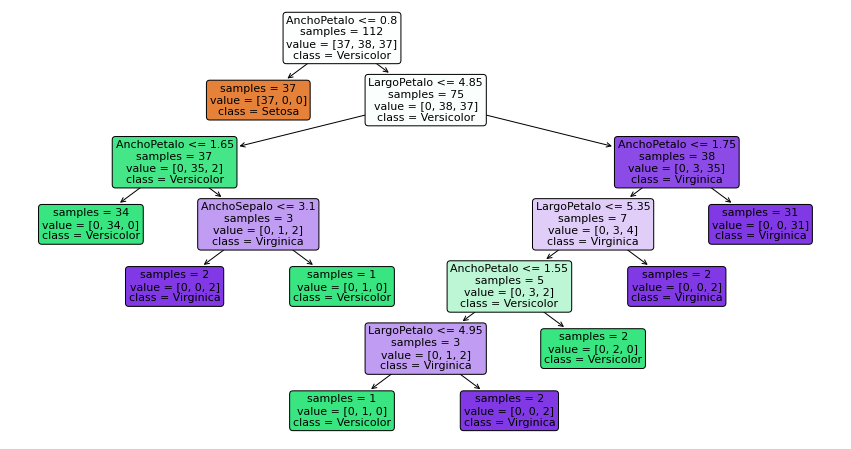

In [11]:
#@title Mostrar Árbol de Decisión


# muestra el árbol
plt.figure(figsize=(15,8))   
tree.plot_tree(clf, 
              feature_names=atributos_entrada, 
              class_names=np.unique(y_train), 
              impurity=False, 
              rounded=True, 
              filled=True,
              fontsize=11)
plt.show()


*** Resultados con datos de Entrenamiento: 

 Reporte de Clasificación: 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        37
  Versicolor       1.00      1.00      1.00        38
   Virginica       1.00      1.00      1.00        37

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Matriz de Confusión ( real / modelo ): 
              m:Setosa  m:Versicolor  m:Virginica  m:na
r:Setosa            37             0            0     0
r:Versicolor         0            38            0     0
r:Virginica          0             0           37     0
r:na                 0             0            0     0




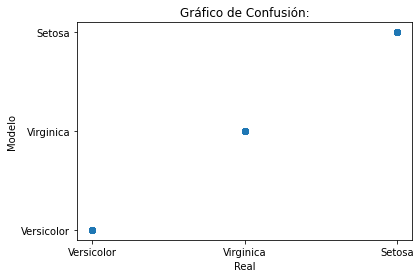

In [12]:
#@title Probar red entrenada con datos de entrenamiento
mostrar_detalle_entrenamiento = False #@param {type:"boolean"}

# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, clases_map, mostrarDetalle=False):

    # procesa las imágenes de prueba con el modelo 
    predClass = clf.predict(x)

    # muestra los resultados con las imágenes 
    classPreds = []
    classReal = []
    for i in range(len(x)):

        # prepara salida
        clReal = y[i]
        clPred = predClass[i]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = 'Real: ' + clReal + ' / Modelo(Árbol): ' 
        strTitulo = strTitulo + clPred 
        strTitulo = strTitulo + ": " + ("ok" if (clPred==clReal) else "error!")

        # muestra comparación con la imagen
        if mostrarDetalle:
          print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds))

    # muestra matriz de confusion
    print('\nMatriz de Confusión ( real / modelo ): ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm, 
        index=['r:{:}'.format(x) for x in clases_map], 
        columns=['m:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    cmtx.sort_index(axis=0, inplace=True)
    cmtx.sort_index(axis=1, inplace=True)   
    print(cmtx)
    print("\n")

    # gráfico de comparación
    plt.title('Gráfico de Confusión:')
    plt.xlabel('Real')
    plt.ylabel('Modelo')
    plt.scatter(classReal, classPreds)

# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, CLASES, mostrar_detalle_entrenamiento)




*** Resultados con datos de Prueba: 

 Reporte de Clasificación: 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        12
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Matriz de Confusión ( real / modelo ): 
              m:Setosa  m:Versicolor  m:Virginica  m:na
r:Setosa            13             0            0     0
r:Versicolor         0            12            0     0
r:Virginica          0             0           13     0
r:na                 0             0            0     0




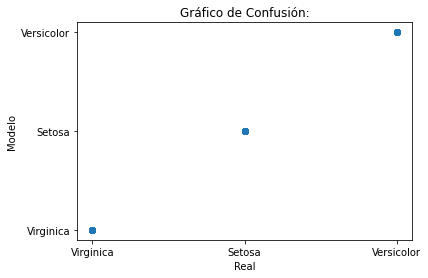

In [14]:
 #@title Probar red entrenada con datos de prueba
 # evalua al modelo entrenado
mostrar_detalle_prueba = False #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, CLASES, mostrar_detalle_prueba)